In [9]:
import math
import random
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [10]:
fx = lambda x: ((15 * x**3 + 21 * x**2 + 41 * x + 3)**0.25) * math.exp(-0.5*x)
a = 1
b = 4
step = 100
np.random.seed(4)
random.seed(4)

In [11]:
def approx_integration(n, a, b, fx):
    sum = 0
    for i in range(n):
        xi = random.uniform(a, b)
        sum += fx(xi)
    return (1/n) * (b-a) * sum
        
def compare(fx, a, b, n):
    
    res2 = scipy.integrate.quad(fx, a, b)
    closet_idx = 0
    loop_idx = 0
    diff = 1000000000
    
    arr = []
    for current_step in range(n, 10000 + n, n ):
        temp = approx_integration(current_step, a, b, fx)
        print("current_step ", current_step, " res ", temp)
        arr.append(temp)
        
        if abs(temp - res2[0]) < diff:
            diff = abs(temp - res2[0])
            closet_idx = loop_idx
        loop_idx += 1
    
    print("scipy integrate ", res2)
    print("closet index ", closet_idx, " with n ", (closet_idx+1) * n, " with val ", arr[closet_idx])
    
    return arr, res2, closet_idx #not sure if this method of getting best n is correct (should we get it from 1/sqrt(n) instead?)



current_step  100  res  4.057299992129373
current_step  200  res  4.018957497250447
current_step  300  res  4.01192229666415
current_step  400  res  4.016323621376975
current_step  500  res  3.9962673529056953
current_step  600  res  4.011251871132084
current_step  700  res  3.972543896868086
current_step  800  res  3.9635910063814714
current_step  900  res  4.00757940481594
current_step  1000  res  3.9356330617451025
current_step  1100  res  4.011468161292494
current_step  1200  res  4.032288652042825
current_step  1300  res  3.9857469944423456
current_step  1400  res  4.02801836232781
current_step  1500  res  4.025668338717359
current_step  1600  res  4.023347692022094
current_step  1700  res  4.011036272147444
current_step  1800  res  3.9840813436887643
current_step  1900  res  4.010590711858178
current_step  2000  res  3.98781277490533
current_step  2100  res  3.983190177097609
current_step  2200  res  4.014716528809992
current_step  2300  res  4.025247807800723
current_step  2400 

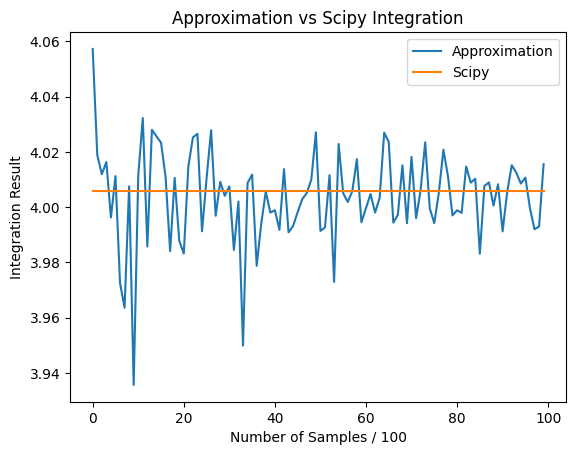

In [12]:
#req 1
arr, res2, closet_idx = compare(fx, a, b, step)  

# Plot the results on the same graph
plt.plot(arr, label="Approximation")
plt.plot([res2[0]] * len(arr), label="Scipy")
plt.title("Approximation vs Scipy Integration")
plt.xlabel(f"Number of Samples / {step}")
plt.ylabel("Integration Result")
plt.legend()
plt.show()

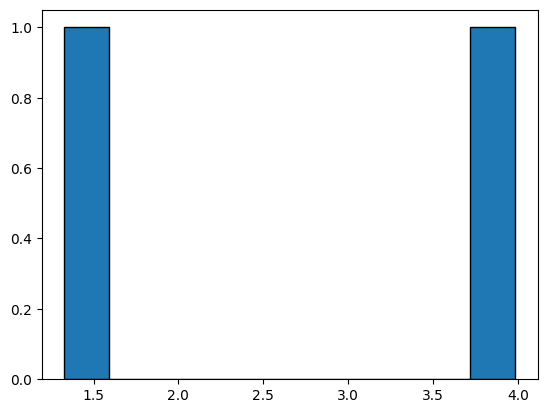

req2 stddev  1.327703949968876


In [5]:
#req 2 #NOT DONE
step = 1000
lst = []
for i in range(500):
    t = approx_integration(step, a, b, fx)  
    lst.append([ t/(b-a), t])

fig, ax = plt.subplots()
ax.hist(lst[0], bins=10, edgecolor='black')

# Display the graph
plt.show() 
#histogram isn't done/correct

print("req2 stddev ", np.std(lst[0]))